# Melbourne House Pricing Prediction

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Extraction

In [2]:
df = pd.read_csv('../input/housing-dataset/melbourne_housing.csv')

In [3]:
df.shape

(13580, 21)

In [4]:
df.head()

Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5      3067  ...         1  1.0       202           NaN   
1   4/2/2016       2.5      3067  ...         1  0.0       156          79.0   
2   4/3/2017       2.5      3067  ...         2  0.0       134         150.0   
3   4/3/2017       2.5      3067  ...         2  1.0        94           NaN   
4   4/6/2016       2.5      3067  ...         1  2.0       120         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0          4019  
1          4019  
2          4019  
3          4019  
4          4019  

[5 rows x 21 columns]

In [5]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
#handling missing value
df.dropna(inplace = True)

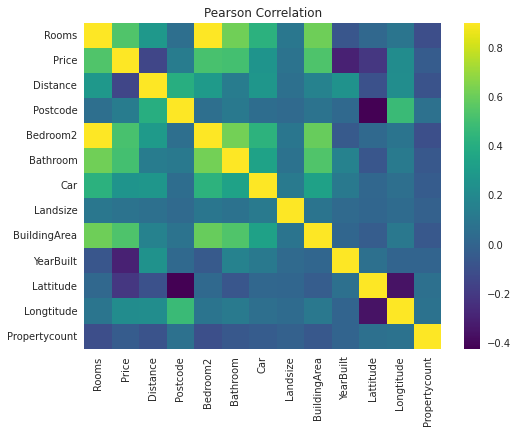

In [8]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), vmax = 0.9, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

# Visualization

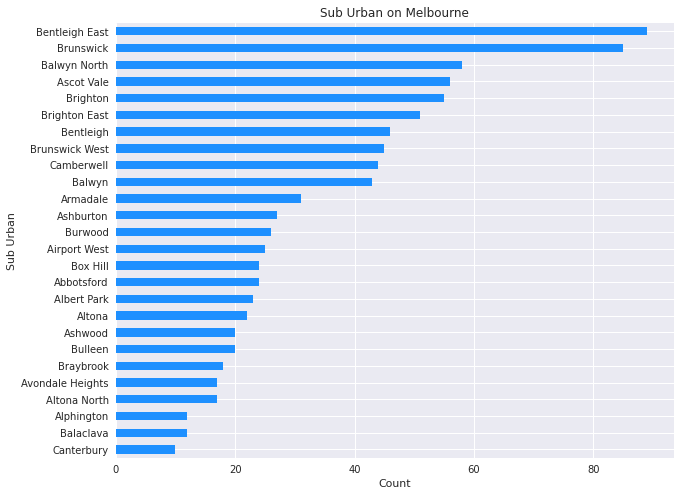

In [9]:
#visualize sub urban
plt.figure(figsize = (10,8))
df['Suburb'][0:900].value_counts().sort_values().plot(kind = 'barh', color = 'dodgerblue')
plt.xlabel("Count")
plt.ylabel("Sub Urban")
plt.title("Sub Urban on Melbourne")
plt.rcParams.update({'font.size': 5})
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


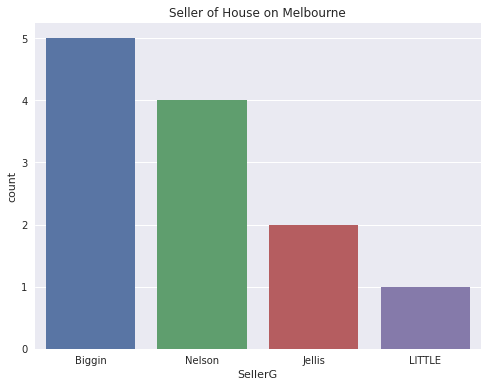

In [10]:
#visualize seller of house
plt.figure(figsize = (8,6))
sns.countplot(df['SellerG'][0:12])
plt.title("Seller of House on Melbourne")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


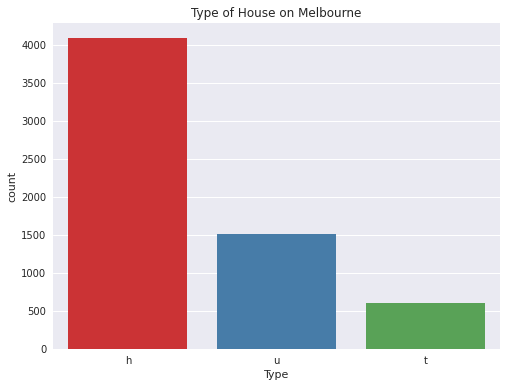

In [11]:
#visualize type of house
plt.figure(figsize = (8,6))
sns.countplot(df['Type'], palette = 'Set1')
plt.title("Type of House on Melbourne")
plt.show()

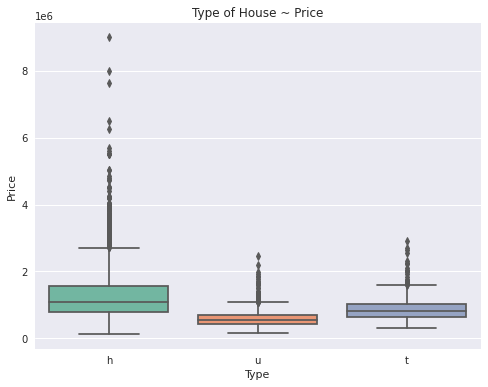

In [12]:
#visualize type of house ~ price
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Type', y = 'Price', palette = 'Set2')
plt.title("Type of House ~ Price")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


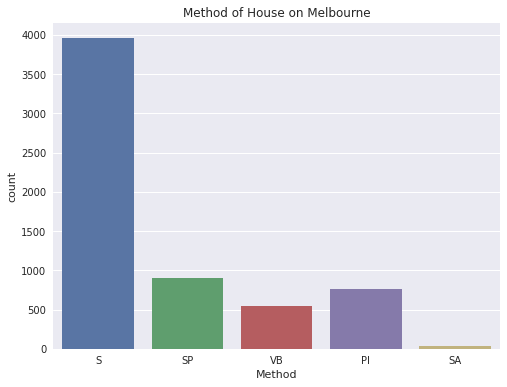

In [13]:
#visualize method of House
plt.figure(figsize = (8,6))
sns.countplot(df['Method'])
plt.title("Method of House on Melbourne")
plt.show()

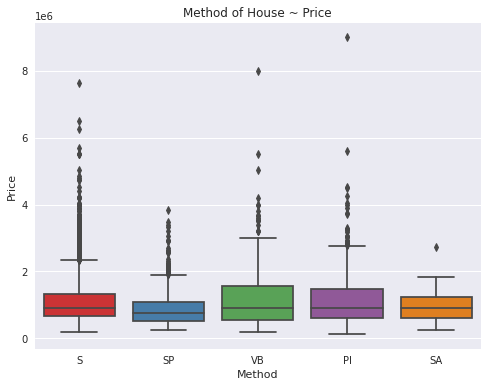

In [14]:
#visualize method of house ~ price
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Method', y = 'Price', palette = 'Set1')
plt.title("Method of House ~ Price")
plt.show()

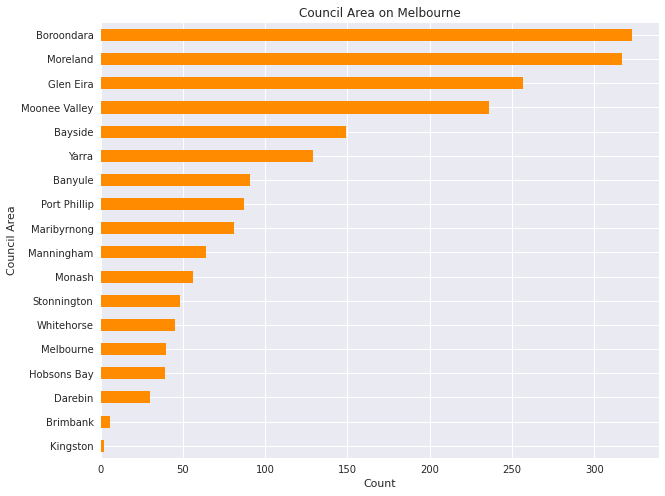

In [15]:
#visualize council area of house
plt.figure(figsize = (10,8))
df['CouncilArea'][0:2000].value_counts().sort_values().plot(kind = 'barh', color = 'darkorange')
plt.xlabel("Count")
plt.ylabel("Council Area")
plt.title("Council Area on Melbourne")
plt.rcParams.update({'font.size': 5})
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


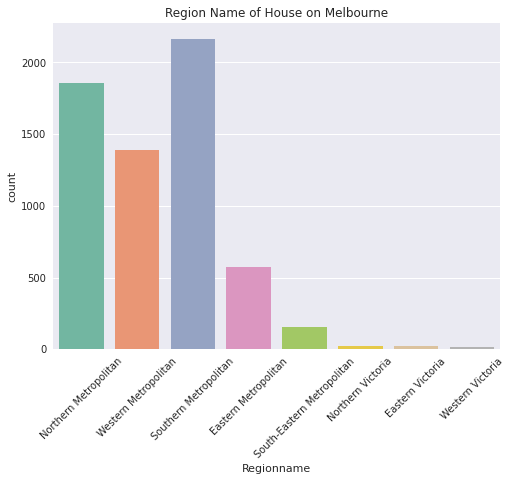

In [16]:
#visualize region name
plt.figure(figsize = (8,6))
chart = sns.countplot(df['Regionname'], palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Region Name of House on Melbourne")
plt.show()

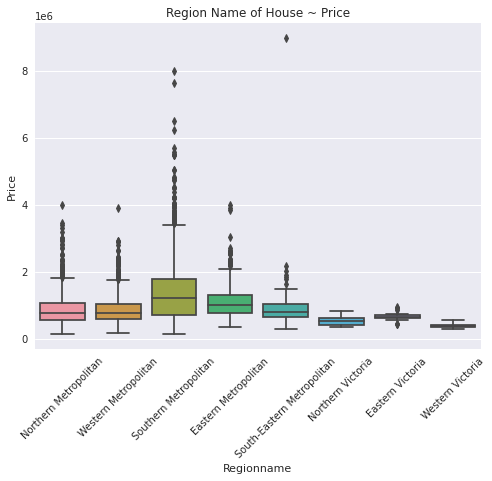

In [17]:
#visualize region name ~ price
plt.figure(figsize = (8,6))
chart = sns.boxplot(data = df, x = 'Regionname', y = 'Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Region Name of House ~ Price")
plt.show()

# Linear Regression Model

In [18]:
#handling categorical data
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes

df.head()

Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
1       0     2790      1     0    839       1       18    41        12   
2       0     4520      2     0   1118       3       18    42        12   
4       0     4882      3     0   1174       4      112    43        12   
6       0     1027      2     0   1291       1      112    47        12   
7       0     6101      1     0   1193       1      112    48        12   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
1        50  ...         0    0       110            85         23   
2        50  ...         1    0        88           224         23   
4        50  ...         0    2        74           212        130   
6        50  ...         1    0       198           313         32   
7        50  ...         0    2       209           143         17   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
1           29       1712        1839           2            135  
2           29       1690        1854           2            135  
4           29       1722        1851           2            135  
6           29       1788        1932           2            135  
7           29       1737        1869           2            135  

[5 rows x 21 columns]

In [19]:
#split data 
X = df.drop('Price', axis = 1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4337, 20)
(4337,)
(1859, 20)
(1859,)


In [20]:
#build model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 10.8 ms, sys: 2.96 ms, total: 13.8 ms
Wall time: 16.9 ms


0.7975148131465108

In [21]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[ 904.34726138  452.78533275  847.02251101 ...  121.90508042 1015.86250292
  713.22089852]


In [22]:
#check MAE, MSE & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  145.55
Mean Squared Error :  33717.01
Root Mean Squared Error :  12.064410470470573


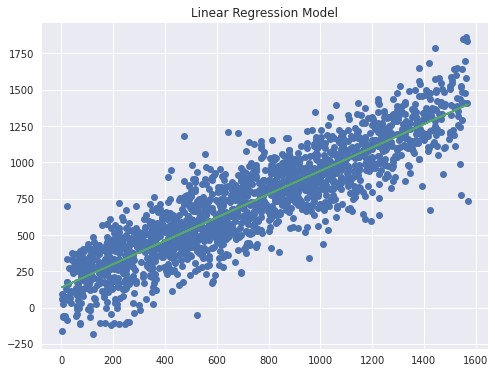

In [23]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


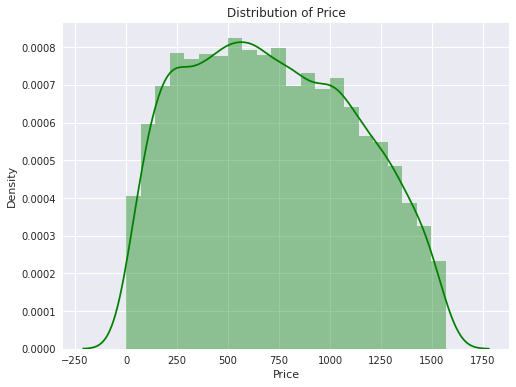

In [24]:
#distribution
plt.figure(figsize = (8,6))
sns.distplot(df['Price'], color = 'g')
plt.title("Distribution of Price")
plt.show()

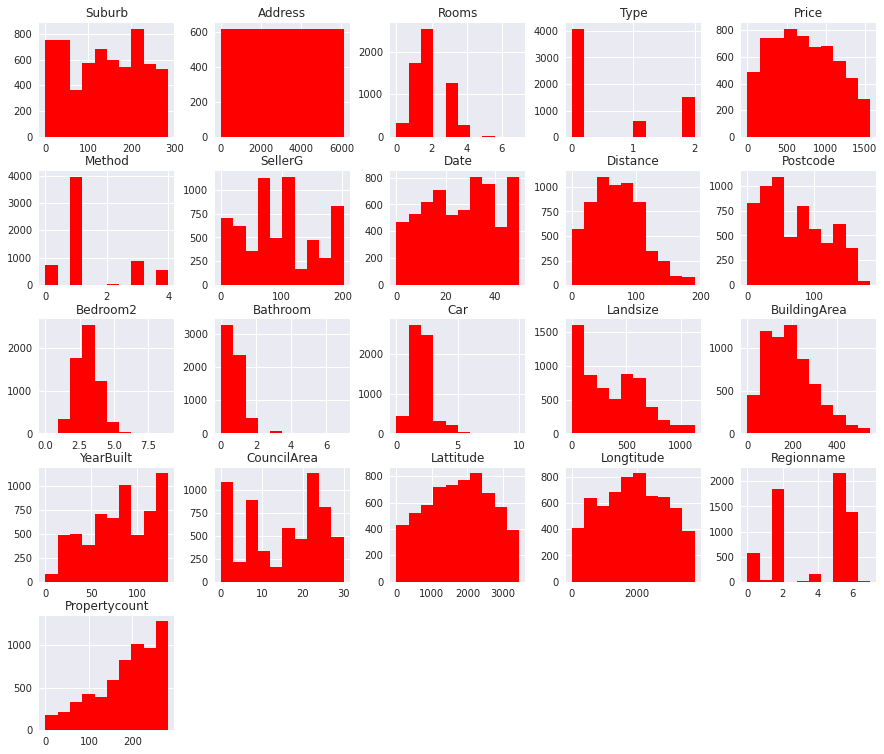

In [25]:
#visualize histogram of each attribute value
df.hist(figsize = (15,13), color = 'r')
plt.show()